In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/Advertising.csv')


In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
#null values
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
radio,0
newspaper,0
sales,0


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['TV', 'radio', 'newspaper']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled_features = pd.DataFrame(X_scaled, columns=features)
display(df_scaled_features.head())

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales', 'sales_category'], dtype='object')


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


y = df['sales_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_svc_model = SVC(kernel='linear')
linear_svc_model.fit(X_train, y_train)

y_pred_linear_svc = linear_svc_model.predict(X_test)


accuracy_linear = accuracy_score(y_test, y_pred_linear_svc)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear_svc)

print(f'Linear SVC - Accuracy: {accuracy_linear:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_linear}')


Linear SVC - Accuracy: 0.9000
Confusion Matrix:
[[15  1]
 [ 3 21]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

y = df['sales_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_svc_model = SVC(kernel='linear')
linear_svc_model.fit(X_train, y_train)

y_pred_linear_svc = linear_svc_model.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear_svc)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear_svc)

print(f'Linear SVC - Accuracy: {accuracy_linear:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_linear}')
print("-" * 30)

poly_svc_model = SVC(kernel='poly', degree=3)
poly_svc_model.fit(X_train, y_train)


y_pred_poly_svc = poly_svc_model.predict(X_test)


accuracy_poly = accuracy_score(y_test, y_pred_poly_svc)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly_svc)

print(f'Polynomial SVC - Accuracy: {accuracy_poly:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_poly}')
print("-" * 30)


sigmoid_svc_model = SVC(kernel='sigmoid')
sigmoid_svc_model.fit(X_train, y_train)

y_pred_sigmoid_svc = sigmoid_svc_model.predict(X_test)


accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid_svc)
conf_matrix_sigmoid = confusion_matrix(y_test, y_pred_sigmoid_svc)

print(f'Sigmoid SVC - Accuracy: {accuracy_sigmoid:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_sigmoid}')
print("-" * 30)

rbf_svc_model = SVC(kernel='rbf')
rbf_svc_model.fit(X_train, y_train)


y_pred_rbf_svc = rbf_svc_model.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf_svc)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf_svc)

print(f'RBF SVC - Accuracy: {accuracy_rbf:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_rbf}')


Linear SVC - Accuracy: 0.9000
Confusion Matrix:
[[15  1]
 [ 3 21]]
------------------------------
Polynomial SVC - Accuracy: 0.9500
Confusion Matrix:
[[15  1]
 [ 1 23]]
------------------------------
Sigmoid SVC - Accuracy: 0.3000
Confusion Matrix:
[[ 4 12]
 [16  8]]
------------------------------
RBF SVC - Accuracy: 0.8500
Confusion Matrix:
[[15  1]
 [ 5 19]]


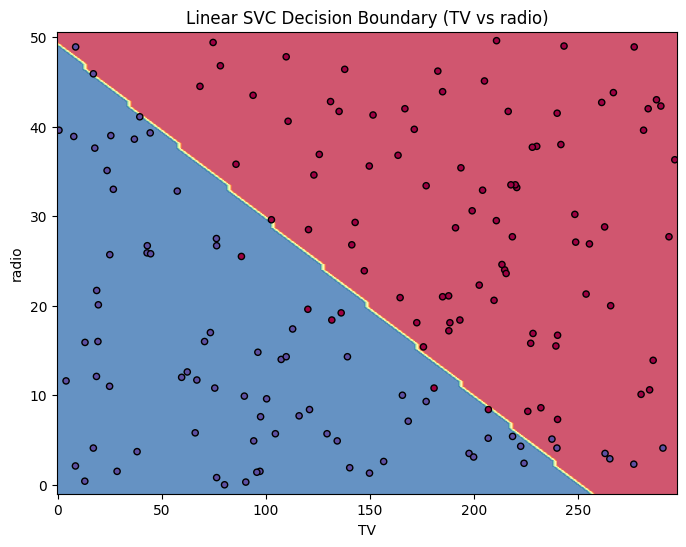

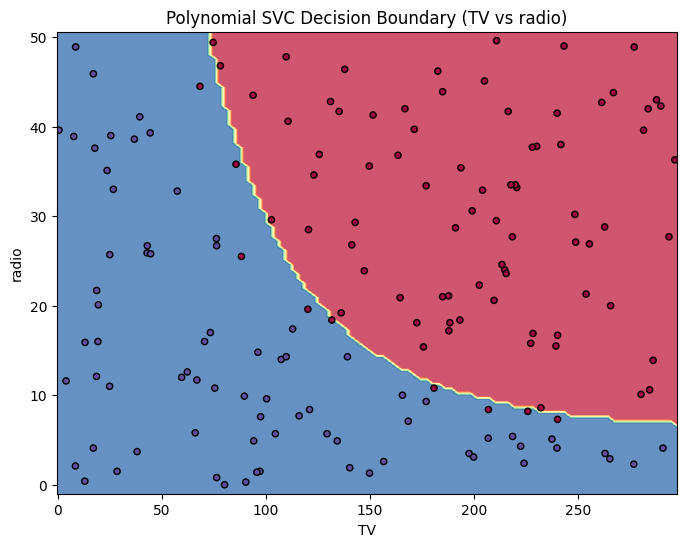

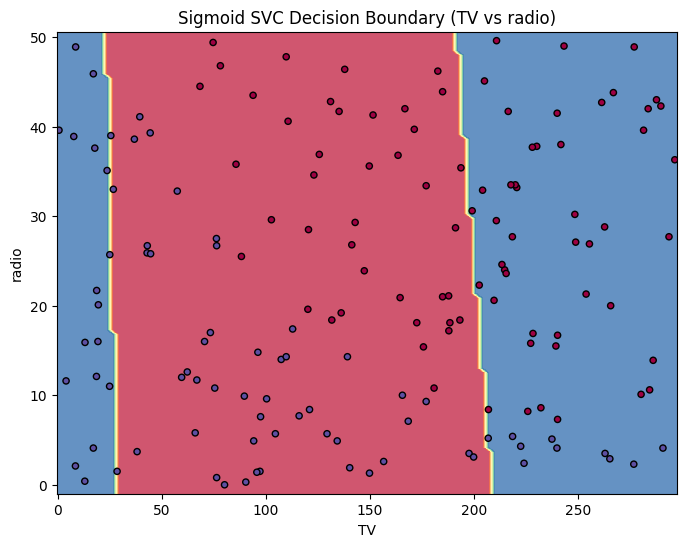

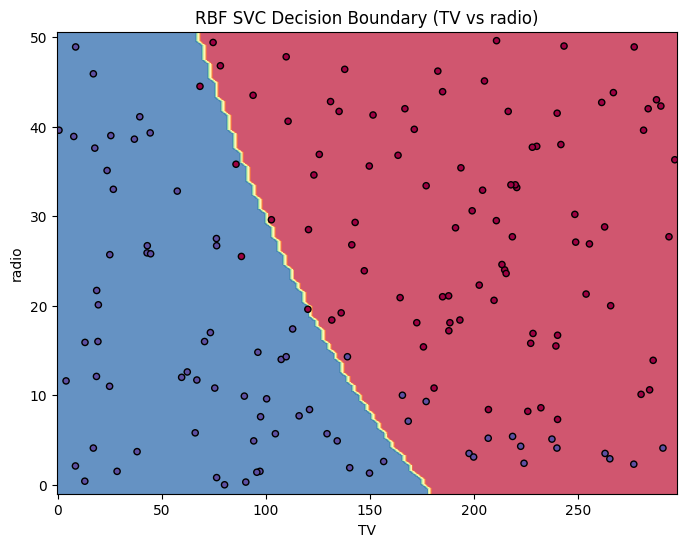

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Assuming X_train, y_train, linear_svc_model, poly_svc_model, sigmoid_svc_model, and rbf_svc_model are defined

# For visualization, let's use only two features: 'TV' and 'radio'
X_train_2d = X_train[['TV', 'radio']]
X_test_2d = X_test[['TV', 'radio']]

# We need to retrain the models on the 2D data for visualization purposes
linear_svc_model_2d = SVC(kernel='linear')
linear_svc_model_2d.fit(X_train_2d, y_train)

poly_svc_model_2d = SVC(kernel='poly', degree=3)
poly_svc_model_2d.fit(X_train_2d, y_train)

sigmoid_svc_model_2d = SVC(kernel='sigmoid')
sigmoid_svc_model_2d.fit(X_train_2d, y_train)

rbf_svc_model_2d = SVC(kernel='rbf')
rbf_svc_model_2d.fit(X_train_2d, y_train)


# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    # Create a meshgrid to plot the decision boundaries
    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        ax=ax,
        xlabel='TV',
        ylabel='radio'
    )

    # Plot the training points
    scatter = ax.scatter(X['TV'], X['radio'], c=y.astype('category').cat.codes, cmap=plt.cm.Spectral, s=20, edgecolors='k')
    ax.set_title(title)
    plt.show()

# Plot decision boundaries for each model
plot_decision_boundary(linear_svc_model_2d, X_train_2d, y_train, 'Linear SVC Decision Boundary (TV vs radio)')
plot_decision_boundary(poly_svc_model_2d, X_train_2d, y_train, 'Polynomial SVC Decision Boundary (TV vs radio)')
plot_decision_boundary(sigmoid_svc_model_2d, X_train_2d, y_train, 'Sigmoid SVC Decision Boundary (TV vs radio)')
plot_decision_boundary(rbf_svc_model_2d, X_train_2d, y_train, 'RBF SVC Decision Boundary (TV vs radio)')

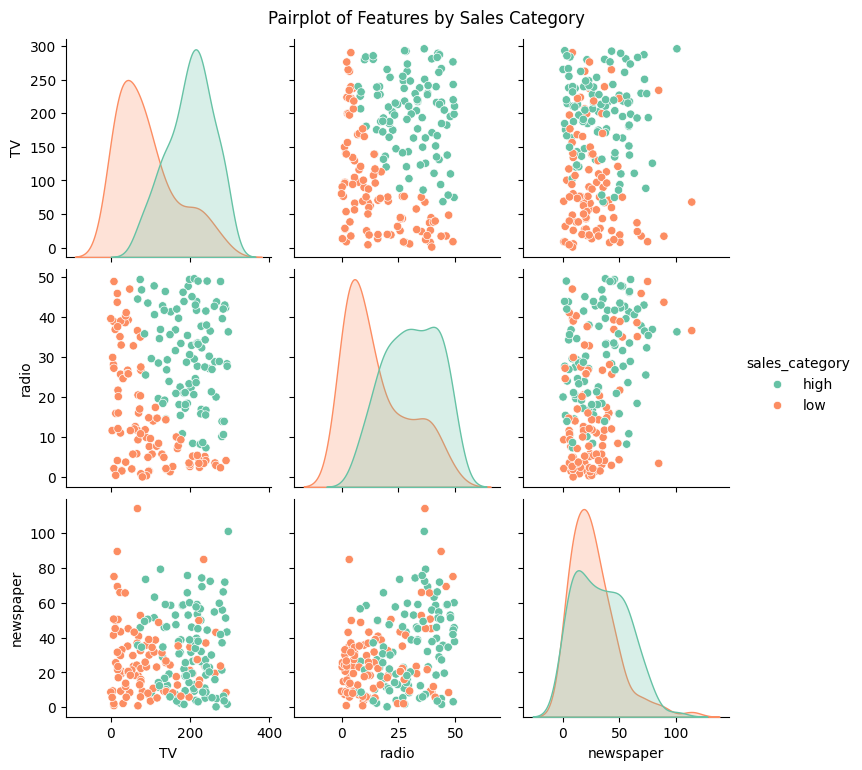

In [ ]:


sns.pairplot(df[['TV', 'radio', 'newspaper', 'sales_category']], hue='sales_category', palette='Set2')
plt.suptitle("Pairplot of Features by Sales Category", y=1.02)
plt.show()

CLASSIFICATION RESULTS (SVC):

=== sales_category — Kernel: linear ===
Accuracy: 0.9000

Classification Report:
               precision    recall  f1-score   support

        high       0.83      0.94      0.88        16
         low       0.95      0.88      0.91        24

    accuracy                           0.90        40
   macro avg       0.89      0.91      0.90        40
weighted avg       0.91      0.90      0.90        40



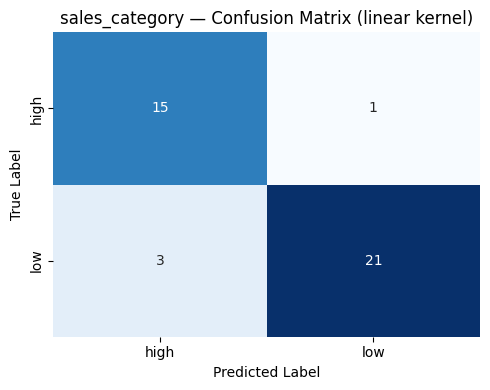


=== sales_category — Kernel: poly ===
Accuracy: 0.9500

Classification Report:
               precision    recall  f1-score   support

        high       0.94      0.94      0.94        16
         low       0.96      0.96      0.96        24

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



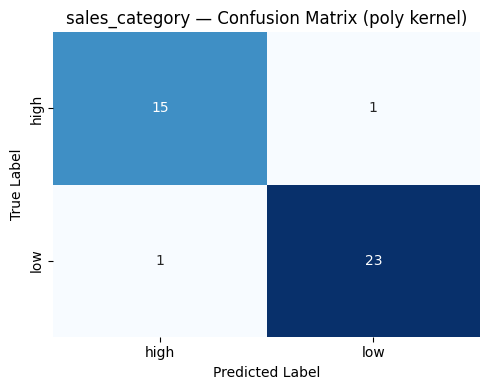


=== sales_category — Kernel: sigmoid ===
Accuracy: 0.3000

Classification Report:
               precision    recall  f1-score   support

        high       0.20      0.25      0.22        16
         low       0.40      0.33      0.36        24

    accuracy                           0.30        40
   macro avg       0.30      0.29      0.29        40
weighted avg       0.32      0.30      0.31        40



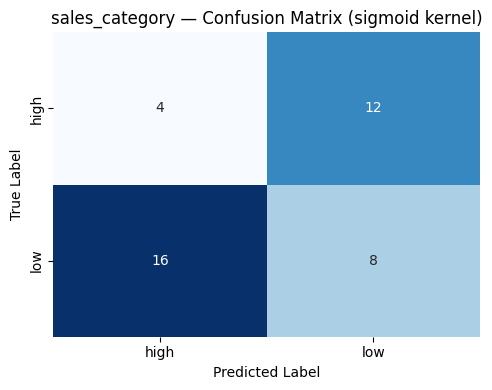


=== sales_category — Kernel: rbf ===
Accuracy: 0.8500

Classification Report:
               precision    recall  f1-score   support

        high       0.75      0.94      0.83        16
         low       0.95      0.79      0.86        24

    accuracy                           0.85        40
   macro avg       0.85      0.86      0.85        40
weighted avg       0.87      0.85      0.85        40



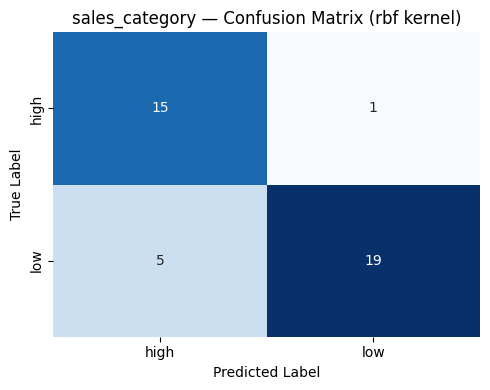

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

results = {}

print("CLASSIFICATION RESULTS (SVC):")
for kernel in ['linear', 'poly', 'sigmoid', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)

    acc = accuracy_score(y_test_clf, y_pred)
    cm = confusion_matrix(y_test_clf, y_pred)
    cr = classification_report(y_test_clf, y_pred, zero_division=0)

    results[kernel] = {
        'Accuracy': acc,
        'Confusion Matrix': cm,
        'Classification Report': cr
    }


    print(f"\n=== sales_category — Kernel: {kernel} ===")
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", cr)


    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"sales_category — Confusion Matrix ({kernel} kernel)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()
